In [33]:
from pathlib import Path
import librosa
import numpy as np

# Load audio from random song
audio_path = Path.cwd().parent.parent / 'Training_Data' / 'fully_curated' / '03a' / 'other.wav'
raw_audio, sr = librosa.load(audio_path)

print(raw_audio.shape)
print(sr)

(4219168,)
22050


old spec shape: (513, 865)
J: 482
new spec shape: (482, 865)
l2_squared shape: (865,)
l4 shape: (865,)


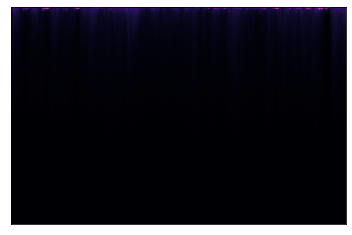

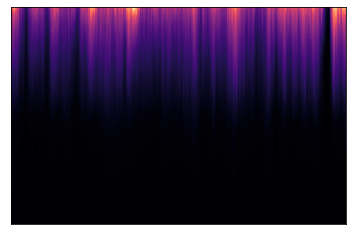

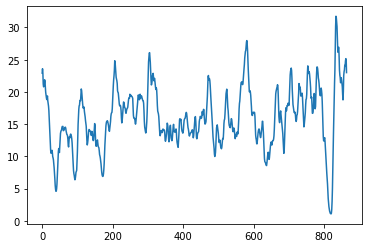

In [59]:
import math
import matplotlib.pyplot as plt

def ninos(audio, sr, gamma=0.94):
    '''Calculates Normalized Identifying Note Onsets based on Spectral Sparsity (NINOS)
    over time for audio.
   
    Implementation as described in 
        https://www.eurasip.org/Proceedings/Eusipco/Eusipco2016/papers/1570256369.pdf 
        
    Each time bin in the returned frame corresponds to 4.6ms of audio data.

    Args:
        audio (1D numpy array): Raw audio samples
        sr (int): sample rate
        gamma (float in (0,1]): Proportion of frequency bins to keep
    
    Returns:
        
    '''
    # Define spectrogram parameters
    if sr == 22050:
        n_fft = 1024
        hop_length = 102
    elif sr == 44100:
        n_fft = 2048
        hop_length = 205
    
    # Compute spectrogram
    spec = np.abs(librosa.stft(audio, n_fft, hop_length))
    
    # Order by magnitude within each time bin
    spec = np.sort(spec, axis=0)
    plt.figure()
    librosa.display.specshow(spec)
    
    # Remove the highest energy frames, cut down by factor of gamma
    J = math.floor(spec.shape[0]*gamma)
    print(f'old spec shape: {spec.shape}')
    spec = spec[:J,:]
    print(f'J: {J}')
    print(f'new spec shape: {spec.shape}')
    plt.figure()
    librosa.display.specshow(spec)
    
    # Compute squared l2 norm and l4 norm of spec along time axis
    l2_squared = np.square(np.linalg.norm(spec, ord=2, axis=0))
    print(f'l2_squared shape: {l2_squared.shape}')
    l4 = np.linalg.norm(spec, ord=4, axis=0)
    print(f'l4 shape: {l4.shape}')
    
    # Convert to NINOS
    ninos = l2_squared / ((J**(1/4))*l4)
    plt.figure()
    plt.plot(ninos)

    return None

s = 30
# Compute spectrogram of first 4 seconds
audio = raw_audio[s*sr:(s+4)*sr]

_ = ninos(audio, sr)

In [46]:
a = np.array([[5, 4 ,3], [2, 3, 6], [4, 4, 5]])
print(np.sort(a, axis=0))

[[2 3 3]
 [4 4 5]
 [5 4 6]]


In [40]:
np.min(spec)

1.0350598e-08

In [39]:
spec.shape

(513, 865)